In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [111]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [112]:
df=pd.read_csv(r'C:\Users\admin\Documents\Songs\Unsupervised_project\single_genre_artists.csv')
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [113]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [115]:
df.duplicated().sum()

np.int64(0)

In [116]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

###Feature Selection

In [117]:
selected_df= df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
selected_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088,161427
1,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459,223440
2,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443,208267
3,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775,161933
4,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950,167973
...,...,...,...,...,...,...,...,...,...,...
95832,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107,174800
95833,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066,265846
95834,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619,82500
95835,0.562,0.0331,-25.551,0.1030,0.996,0.961000,0.1110,0.386,63.696,185250


In [118]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_df)
X = pd.DataFrame(scaled_data, columns=selected_df.columns)
X



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143
...,...,...,...,...,...,...,...,...,...,...
95832,0.560713,0.113908,0.800599,-0.464870,-1.038056,-0.353405,-0.322428,0.264864,1.608703,-0.288165
95833,-0.378671,0.558254,1.372746,-0.499000,-0.956340,-0.353405,-0.678133,-1.117507,0.414907,0.485036
95834,0.142494,-2.217003,-3.877872,-0.184566,1.625267,3.832648,-0.629163,1.272422,-1.620420,-1.072017
95835,-0.159910,-2.149717,-3.241498,-0.239029,1.625267,3.781021,-0.613019,-0.758816,-1.783486,-0.199419


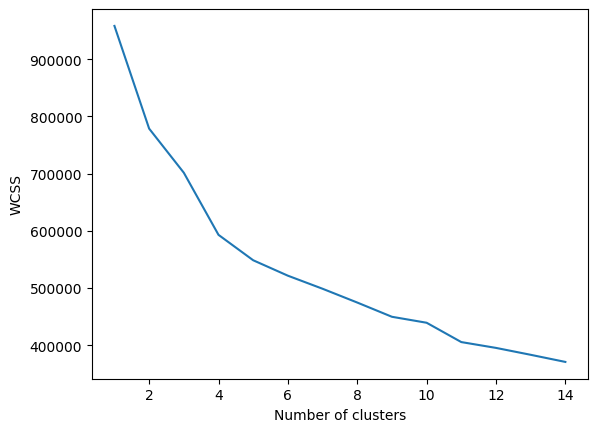

In [119]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0,n_init='auto',max_iter=3000)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [120]:
kmeans=KMeans(n_clusters=8,random_state=0,n_init='auto')
kmeans.fit(X)
kmeans.inertia_
df['Target']=kmeans.predict(X)
df


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,Target
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22,7
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22,6
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22,6
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22,7
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56,1
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36,3
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52,5
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55,5


In [121]:
score=silhouette_score(X,kmeans.labels_)
score

0.1682452894245006

In [122]:
# Features to use for similarity
features = ['danceability','energy','loudness','speechiness',
            'acousticness','instrumentalness','liveness','valence',
            'tempo','duration_ms']

# Create a DataFrame with numeric features + song names
df_features = selected_df[features].copy()
# Get song names from original df using the index
df_features['name_song'] = df.loc[selected_df.index, 'name_song'].values


In [126]:
X_small = X_features.sample(20000, random_state=42)
cos_sim_small = cosine_similarity(X_small)


In [128]:
def recommendation(song_index, top_n=3):
    scores = list(enumerate(cos_sim[song_index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = [s for s in scores if s[0] != song_index]
    scores = scores[:top_n]
    
    recommendations = [(df_features.iloc[i]['name_song'], round(score, 2)) for i, score in scores]
    return recommendations

# Example: recommend top 3 songs similar to song at index 4
recommendation(4, top_n=3)


[('Si no estuvieras tú', np.float64(1.0)),
 ('Haseenon Se Muhabbat Ka Bura Anjaam', np.float64(1.0)),
 ('Live And Let Die - 2018 Remaster', np.float64(1.0))]